In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка локальных CSV-файлов в DataFrame
df1 = pd.read_csv("dataset_1.csv")  
df2 = pd.read_csv("dataset_2.csv")
df3 = pd.read_csv("dataset_3.csv")

In [67]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
df1.shape

(768, 9)

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [70]:
df1.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Pregnancies – количество беременностей;

Glucose – концентрация глюкозы в плазме крови;

BloodPressure – дистолическое давление крови;

SkinThickness – толщина кожи трицепса;

Insulin – содержания инсулина в крови;

BMI – индекс массы тела;

DiabetesPedigreeFunction – показатель функции генетического диабета;

Age – возраст;

Outcome – целевая переменная, где 0 – нет диабета, 1 – есть.

Распределения значений с разбиением по целевой переменной

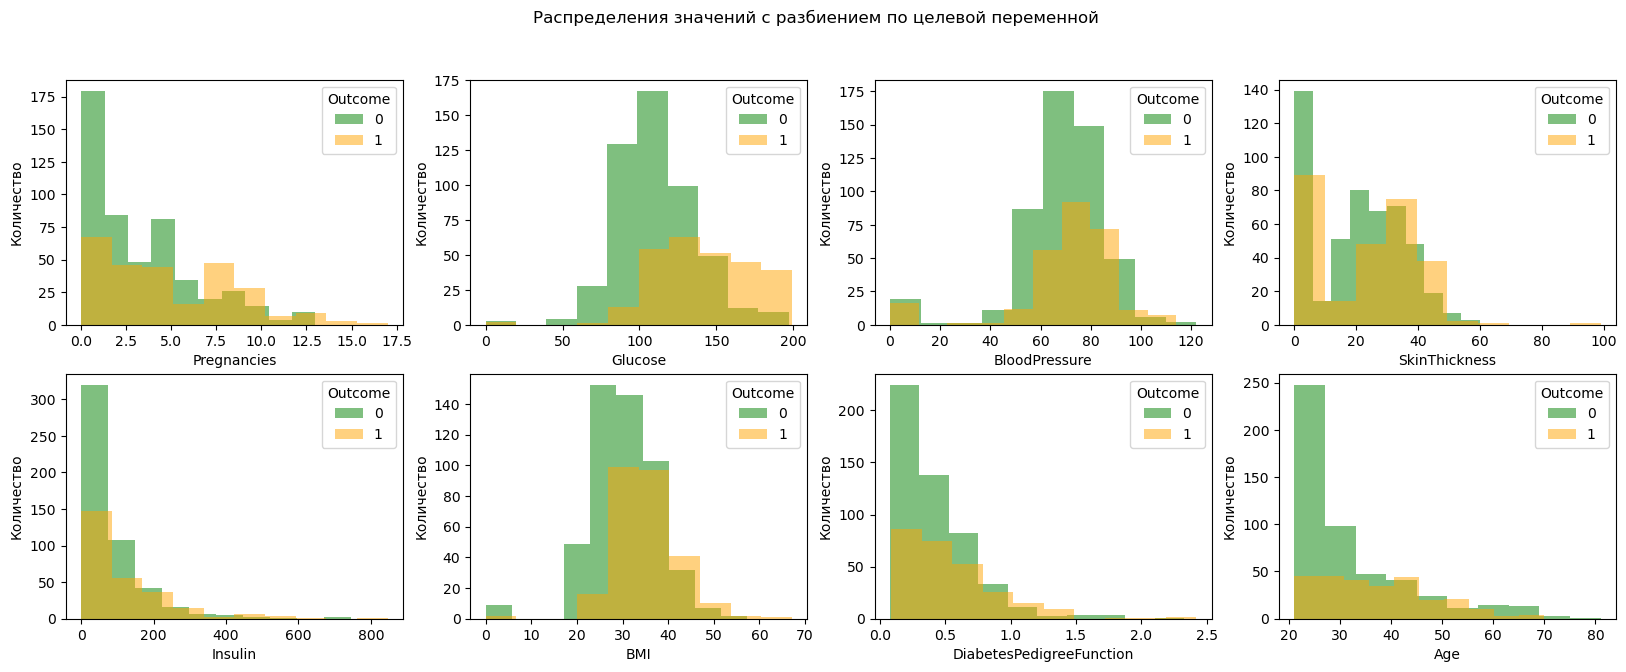

In [71]:
colors = ['green','orange']
feaches = ['Pregnancies',
           'Glucose',
           'BloodPressure',
           'SkinThickness',
           'Insulin',
           'BMI',
           'DiabetesPedigreeFunction',
           'Age']

plt.figure(figsize=(20,7))
plt.suptitle('Распределения значений с разбиением по целевой переменной')

for f in range(8):
  plt.subplot(2, 4, f+1)
  for i in range(2):
    color = colors[i]
    data = df1[df1['Outcome'] == i]

    plt.hist(data[feaches[f]], color=color, alpha=0.5)

  plt.xlabel(feaches[f])
  plt.ylabel('Количество')
  plt.legend([0,1], title='Outcome');


In [72]:
df1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


 **Выводы**

Датасет довольно мал, чтобы делать прогнозы. Выборка несбалансирована: пациентов с риском в 2 раза меньше, чем без.

Из графиков видно, что на результат влияют почти все параметры: Артериальное давление (BloodPressure) в меньшей степени

Наличие диабета больше всего связано с уровнем глюкозы (корреляция 0,47), с индексом массы (корреляция 0,29).
Также зависит от возраста и количества беременностей, но возраст и беременности между собой коррелируют (0,54), что позволяет сделать вывод, что диабет зависит от беременностей, потому что беременности зависят от возраста.

---

In [73]:
df2 = pd.read_csv('dataset_2.csv')
df2.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [74]:
df2.shape

(848, 16)

In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        830 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       841 non-null    float64
 6   BPMeds           839 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          836 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          764 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 106.1+ KB


In [76]:
# удалить строки, где есть хоть 1 Nan
df2.dropna(inplace=True)

In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 846
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               729 non-null    int64  
 1   age              729 non-null    int64  
 2   education        729 non-null    float64
 3   sex              729 non-null    object 
 4   is_smoking       729 non-null    object 
 5   cigsPerDay       729 non-null    float64
 6   BPMeds           729 non-null    float64
 7   prevalentStroke  729 non-null    int64  
 8   prevalentHyp     729 non-null    int64  
 9   diabetes         729 non-null    int64  
 10  totChol          729 non-null    float64
 11  sysBP            729 non-null    float64
 12  diaBP            729 non-null    float64
 13  BMI              729 non-null    float64
 14  heartRate        729 non-null    float64
 15  glucose          729 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 96.8+ KB


In [78]:
df2['sex'].unique()

array(['M', 'F'], dtype=object)

In [79]:
df2['is_smoking'].unique()

array(['YES', 'NO'], dtype=object)

In [80]:
# заменить 'sex' и 'is_smoking' булевыми столбцами

df2['sex'] = df2['sex'].map({'M': 1, 'F': 0})
df2['is_smoking'] = df2['is_smoking'].map({'NO': 0, 'YES': 1})

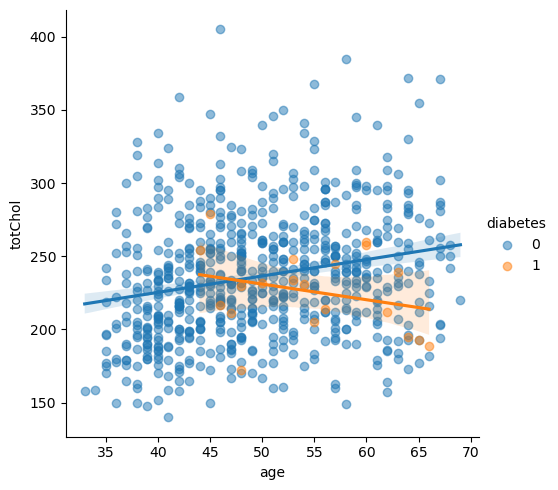

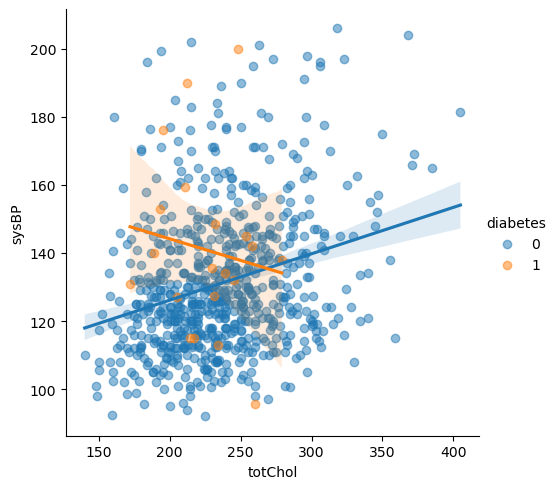

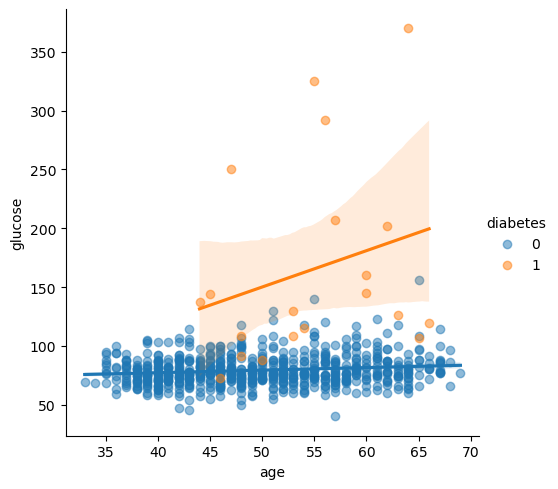

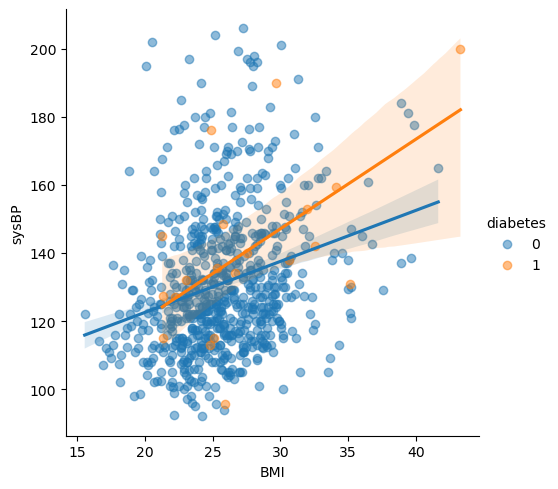

In [81]:
featcher_pairs = [
    ('age', 'totChol'),
    ('totChol', 'sysBP'),
    ('age', 'glucose'),
    ('BMI', 'sysBP')
]

for i in range(len(featcher_pairs)):
  sns.lmplot(
      data = df2, x = featcher_pairs[i][0], y = featcher_pairs[i][1],
      hue="diabetes", fit_reg=True, scatter_kws={'alpha': 0.5}
  )

# fig.suptitle('Распределение индекса массы в зависимости от пола и наличия диабета')
# axes[0].set_title('2й датасет')
# axes[1].set_title('датасет объединенный')
# axes[2].set_title('датасет объединенный чищеный')

plt.show()

**Выводы**

Из графиков видно следующая зависимость:

- с возрастом растёт уровень холестерина, но у пациентов с диабетом он падает;

- с ростом холестерина растёт систолическое давление крови у здоровых людей, а у диабетиков зависимость эта не очень прослеживается;

- с возрастом уровень глюкозы остаётся постоянным, в то время как у диабетиков она растёт;

- у более полных людей выше кровяное давление, и у диабетиков эта зависимость более выражена.

Перевести BMI по интерпретатору:
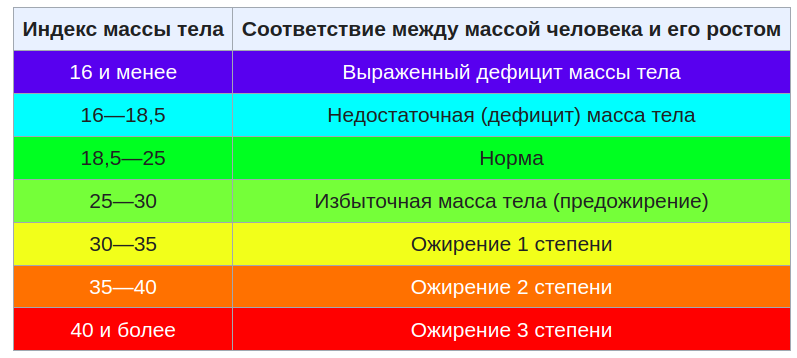

In [82]:
def get_bmi_category(bmi: float) -> int:
  """
    Determines the BMI category for a given Body Mass Index (BMI) value.

    The function categorizes the BMI based on predefined thresholds:
    - 1: Severe underweight (BMI < 16)
    - 2: Underweight (16 ≤ BMI < 18.5)
    - 3: Normal weight (18.5 ≤ BMI < 25)
    - 4: Overweight (25 ≤ BMI < 30)
    - 5: Obesity class I (30 ≤ BMI < 35)
    - 6: Obesity class II (35 ≤ BMI < 40)
    - 7: Obesity class III (BMI ≥ 40)

    If the BMI is 0, the category is considered undefined and the function returns 0.

    Args:
        bmi (float): The Body Mass Index (BMI) value to categorize. Should be non-negative.

    Returns:
        int: An integer representing the BMI category:
            - 0: Undefined (BMI == 0)
            - 1-7: Categories as described above.

    Example:
        >>> get_bmi_category(15.0)
        1
        >>> get_bmi_category(22.0)
        3
        >>> get_bmi_category(0)
        0

  """
  bmi_limits = [16, 18.5, 25, 30, 35, 40]
  if bmi == 0:
    return 0
  for i in range(6):
    if bmi < bmi_limits[i]:
      return i+1
  return 7



In [83]:
df1['BMI_interpr'] = df1['BMI'].apply(get_bmi_category)
df1[['BMI_interpr','BMI']]

,BMI_interpr,BMI
0,5,33.6
1,4,26.6
2,3,23.3
3,4,28.1
4,7,43.1
...,...,...
763,5,32.9
764,6,36.8
765,4,26.2
766,5,30.1


In [84]:
df2['BMI_interpr'] = df2['BMI'].apply(get_bmi_category)
df2[['BMI_interpr','BMI']]

,BMI_interpr,BMI
0,3,24.42
1,4,28.61
3,3,23.40
5,3,22.49
6,4,25.18
...,...,...
841,3,23.88
842,3,24.30
843,4,27.42
844,3,23.08


In [85]:
# соединяем таблицы по целевым столбцам, возрасту и категории индекса массы
merged_df = pd.merge(df1, df2, left_on=['Age', 'BMI_interpr', 'Outcome'], right_on=['age','BMI_interpr', 'diabetes'])
merged_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI_x,DiabetesPedigreeFunction,Age,Outcome,BMI_interpr,...,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI_y,heartRate,glucose
0,10,139,80,0,0,27.1,1.441,57,0,4,...,0.0,0,0,0,220.0,136.0,84.0,26.84,75.0,64.0
1,10,139,80,0,0,27.1,1.441,57,0,4,...,0.0,0,0,0,287.0,136.0,92.0,26.24,65.0,71.0
2,10,139,80,0,0,27.1,1.441,57,0,4,...,0.0,0,0,0,194.0,199.5,107.0,26.84,60.0,69.0
3,10,139,80,0,0,27.1,1.441,57,0,4,...,0.0,0,0,0,193.0,104.0,64.0,26.00,62.0,87.0
4,10,139,80,0,0,27.1,1.441,57,0,4,...,0.0,0,0,0,238.0,128.5,87.5,25.38,80.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,2,105,75,0,0,23.3,0.560,53,0,3,...,0.0,0,1,0,193.0,142.5,100.0,24.15,82.0,69.0
577,2,105,75,0,0,23.3,0.560,53,0,3,...,0.0,0,1,0,297.0,164.0,102.0,24.50,75.0,95.0
578,2,105,75,0,0,23.3,0.560,53,0,3,...,0.0,0,0,0,303.0,117.0,71.0,22.01,108.0,85.0
579,2,105,75,0,0,23.3,0.560,53,0,3,...,0.0,0,0,0,225.0,92.0,69.0,24.17,56.0,68.0


In [86]:
# исключим нереальные наблюдения (мужчины с беременностью)
merged_df_cl = merged_df[(merged_df['sex'] == 0) | (merged_df['Pregnancies'] == 0)]

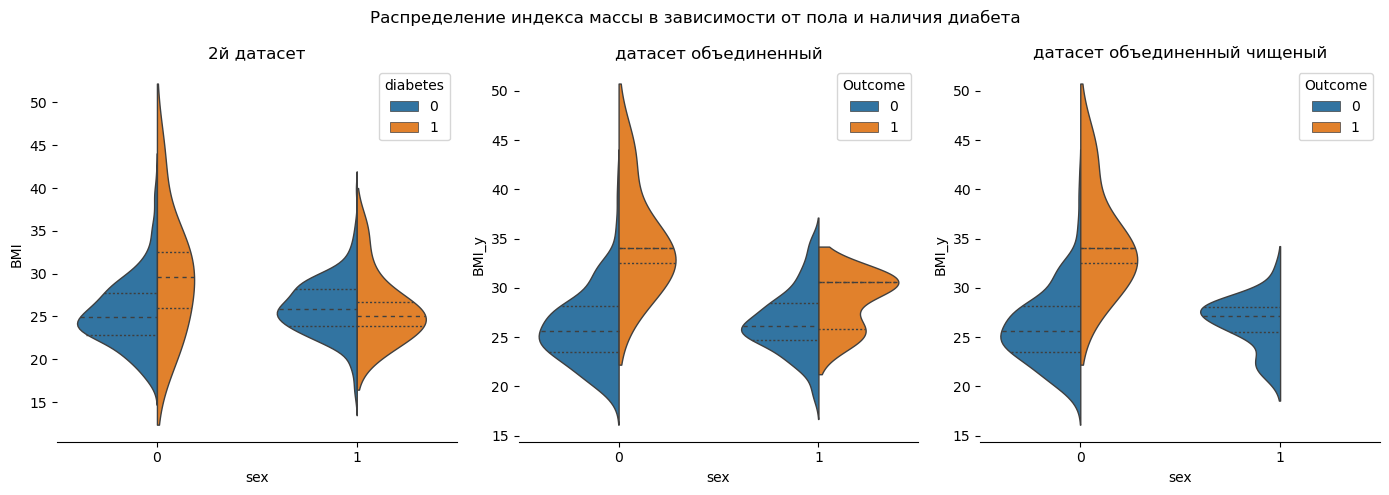

In [87]:
# Построим распределение индекса массы в зависимости от пола и наличия диабета

fig, axes = plt.subplots(1, 3, figsize=(14, 5))

sns.violinplot(
    data=df2, x="sex", y="BMI", hue="diabetes",
    split=True, inner="quart", linewidth=1, ax=axes[0]
)
sns.despine(left=True, ax=axes[0])

sns.violinplot(
    data=merged_df, x="sex", y="BMI_y", hue="Outcome",
    split=True, inner="quart", linewidth=1, ax=axes[1]
)
sns.despine(left=True, ax=axes[1])

sns.violinplot(
    data=merged_df_cl, x="sex", y="BMI_y", hue="Outcome",
    split=True, inner="quart", linewidth=1, ax=axes[2]
)
sns.despine(left=True, ax=axes[2])
fig.suptitle('Распределение индекса массы в зависимости от пола и наличия диабета')
axes[0].set_title('2й датасет')
axes[1].set_title('датасет объединенный')
axes[2].set_title('датасет объединенный чищеный')

plt.tight_layout()
plt.show()

**Выводы**

Исключая мужчин с беременностями, мы теряем мужчин с диабетом. Так как ранее сделали выводы, что диабет коррелирует с количеством беременностей потому, что количество беременностей зависит от возраста, то можно пренебречь фактом наличия беременности у мужчин.

In [88]:
merged_df.columns

# удалить BMI_x и BMI_y, id и дубликаты Age, diabetes

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI_x', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'BMI_interpr',
       'id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI_y', 'heartRate', 'glucose'],
      dtype='object')

In [89]:
df_clear = merged_df[['age', 'sex', 'education', 'Pregnancies', 'Glucose', 'BloodPressure',
                      'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BMI_interpr',
                      'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
                      'totChol', 'sysBP', 'diaBP', 'heartRate', 'glucose', 'Outcome']]
df_clear

,age,sex,education,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,BMI_interpr,...,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,heartRate,glucose,Outcome
0,57,1,1.0,10,139,80,0,0,1.441,4,...,0.0,0.0,0,0,220.0,136.0,84.0,75.0,64.0,0
1,57,0,1.0,10,139,80,0,0,1.441,4,...,0.0,0.0,0,0,287.0,136.0,92.0,65.0,71.0,0
2,57,0,1.0,10,139,80,0,0,1.441,4,...,0.0,0.0,0,0,194.0,199.5,107.0,60.0,69.0,0
3,57,1,1.0,10,139,80,0,0,1.441,4,...,20.0,0.0,0,0,193.0,104.0,64.0,62.0,87.0,0
4,57,1,3.0,10,139,80,0,0,1.441,4,...,0.0,0.0,0,0,238.0,128.5,87.5,80.0,89.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,53,1,3.0,2,105,75,0,0,0.560,3,...,43.0,0.0,0,1,193.0,142.5,100.0,82.0,69.0,0
577,53,0,4.0,2,105,75,0,0,0.560,3,...,1.0,0.0,0,1,297.0,164.0,102.0,75.0,95.0,0
578,53,0,2.0,2,105,75,0,0,0.560,3,...,0.0,0.0,0,0,303.0,117.0,71.0,108.0,85.0,0
579,53,0,1.0,2,105,75,0,0,0.560,3,...,0.0,0.0,0,0,225.0,92.0,69.0,56.0,68.0,0


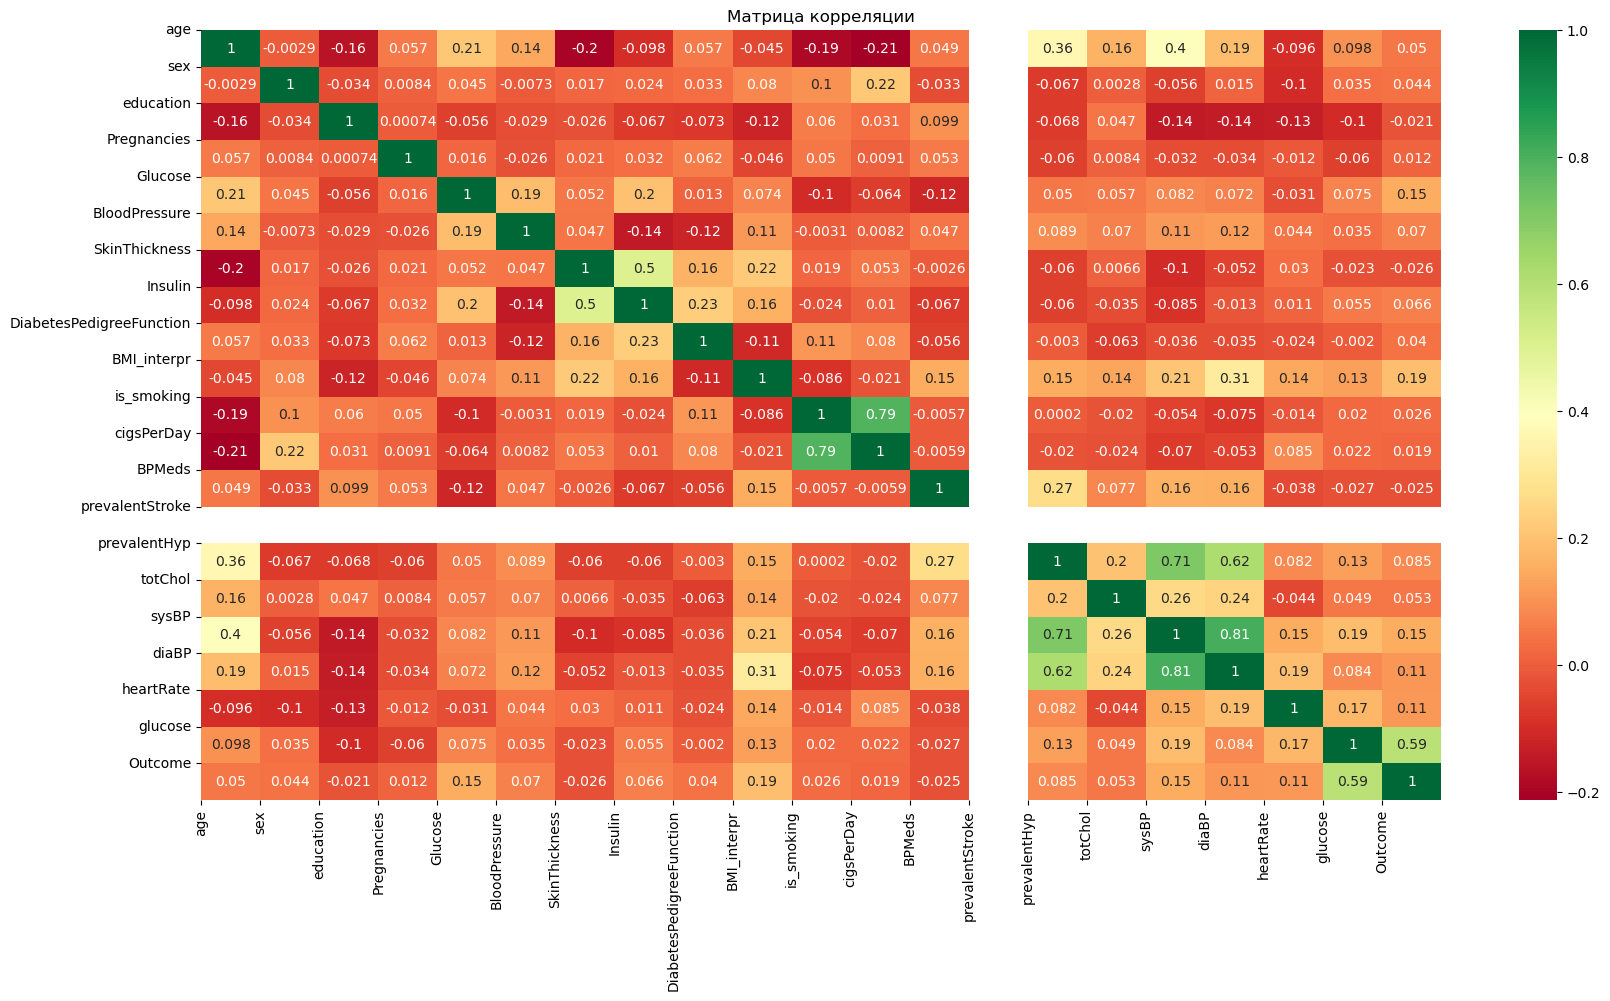

In [90]:
numeric_df = df_clear.select_dtypes(include=['number'])

# Вычисляем матрицу корреляций
correlation_matrix = numeric_df.corr()

# Визуализация
plt.figure(figsize=(20, 10))
# plt.imshow(correlation_matrix, cmap='RdYlGn', aspect='auto')
sns.heatmap(correlation_matrix, cmap='RdYlGn', annot = True)
plt.title('Матрица корреляции')
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.show();


In [91]:
df2['prevalentStroke'].value_counts()

# эту колонку исключим из выборки

0    726
1      3
Name: prevalentStroke, dtype: int64

In [92]:
df_clear.columns.to_list()

['age',
 'sex',
 'education',
 'Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'DiabetesPedigreeFunction',
 'BMI_interpr',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'totChol',
 'sysBP',
 'diaBP',
 'heartRate',
 'glucose',
 'Outcome']

**Выводы**

высокая кореляция между показателями давления; курением и количеством сигарет

После объединения количество данных еще уменьшилось

---

In [93]:
df3 = pd.read_csv('dataset_3.csv')
df3.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [94]:
df3.shape

(253680, 22)

In [95]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [96]:
# проверить и удалить дубликаты
df3.duplicated().sum()

23899

In [97]:
df3.drop_duplicates(inplace = True)

In [98]:
# индекс массы перевести в категории, как в первых датасетах
df3['BMI_interpr'] = df3['BMI'].apply(get_bmi_category)
df3[['BMI_interpr','BMI']]

,BMI_interpr,BMI
0,7,40.0
1,4,25.0
2,4,28.0
3,4,27.0
4,3,24.0
...,...,...
253675,7,45.0
253676,2,18.0
253677,4,28.0
253678,3,23.0


In [99]:
df3['Age'].value_counts()

# возраст переведён в 14 категорий, для слияния таблиц не годится

9.0     29736
10.0    29168
8.0     27301
7.0     23140
11.0    22041
6.0     17299
13.0    16813
12.0    15394
5.0     14050
4.0     12234
3.0     10025
2.0      7068
1.0      5512
Name: Age, dtype: int64

In [100]:
# перевести возраст из первой таблицы df_clear в категории возрастов
ages = list(range(15, 71, 5))
ages.append(100)

df_clear['age_cat'] = df_clear['age'].apply(lambda x: next(i for i, age in enumerate(ages) if age > x))
df_clear[['age_cat','age']]

C:\Users\Alisa\AppData\Local\Temp\ipykernel_17508\2391785365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['age_cat'] = df_clear['age'].apply(lambda x: next(i for i, age in enumerate(ages) if age > x))


,age_cat,age
0,9,57
1,9,57
2,9,57
3,9,57
4,9,57
...,...,...
576,8,53
577,8,53
578,8,53
579,8,53


In [101]:
# перевести в целые бинарные значения и категории
int_cols = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

df3[int_cols] = df3[int_cols].astype(int)

Для слияния таблиц используем 'HighBP' и 'HighChol'.

В первой таблице используем 'sysBP' и 'diaBP', переведем в HighBP

а 'totChol' по нормам лаборатории переведем в HighChol

In [102]:
# если хоть один показатель ('sysBP' или 'diaBP') выше нормы, то ставим высокое давление
df_clear['HighBP'] = ((df_clear['sysBP'] > 140) | (df_clear['diaBP'] > 90)).astype(int)
df_clear['HighBP']

C:\Users\Alisa\AppData\Local\Temp\ipykernel_17508\3663291077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['HighBP'] = ((df_clear['sysBP'] > 140) | (df_clear['diaBP'] > 90)).astype(int)


0      0
1      1
2      1
3      0
4      0
      ..
576    1
577    1
578    0
579    0
580    1
Name: HighBP, Length: 581, dtype: int32

In [103]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 0 to 580
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       581 non-null    int64  
 1   sex                       581 non-null    int64  
 2   education                 581 non-null    float64
 3   Pregnancies               581 non-null    int64  
 4   Glucose                   581 non-null    int64  
 5   BloodPressure             581 non-null    int64  
 6   SkinThickness             581 non-null    int64  
 7   Insulin                   581 non-null    int64  
 8   DiabetesPedigreeFunction  581 non-null    float64
 9   BMI_interpr               581 non-null    int64  
 10  is_smoking                581 non-null    int64  
 11  cigsPerDay                581 non-null    float64
 12  BPMeds                    581 non-null    float64
 13  prevalentStroke           581 non-null    int64  
 14  prevalentH

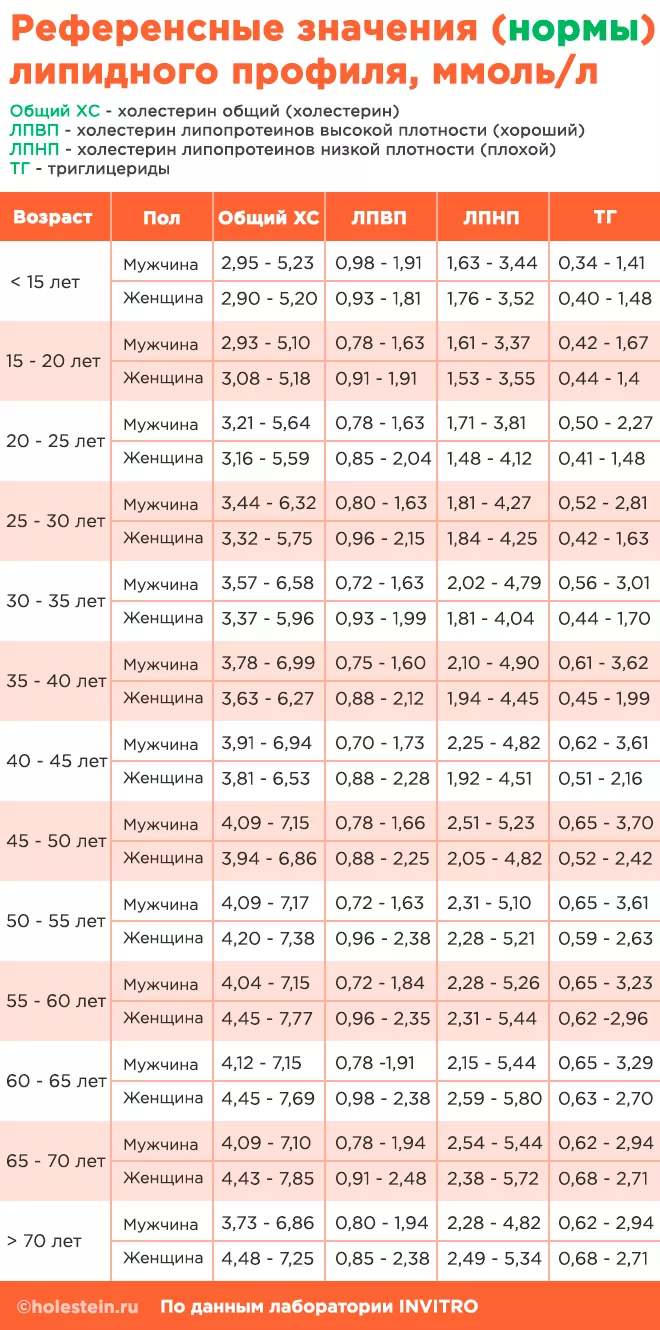

мг/дл х 0,026 ==> ммоль/л.

In [104]:
# выписать верхние значения нормы в переменные
ages = list(range(15, 71, 5))
ages.append(200)
male = [5.23, 5.10, 5.64, 6.32, 6.58, 6.99, 6.94, 7.15, 7.17, 7.15, 7.15, 7.1, 6.86]
female = [5.2, 5.18, 5.59, 5.75, 5.96, 6.27, 6.53, 6.86, 7.38, 7.77, 7.69, 7.85, 7.25]
k = 0.026
len(ages), len(male), len(female)

(13, 13, 13)

In [105]:
def is_high_chol(row: pd.Series) -> int:

  """
  Determines whether the cholesterol level of a given individual is considered high.

  The function compares the individual's total cholesterol (`totChol`) adjusted by a
  coefficient `k` with a threshold determined by their age and sex. The thresholds
  are specified in the `ages`, `male`, and `female` lists.

  Args:
      row (pd.Series): A row from a DataFrame containing the individual's data.
                        Must include the columns 'sex', 'age', and 'totChol'.

  Returns:
      int: 1 if the individual's cholesterol level is considered high, 0 otherwise.

  Raises:
      KeyError: If the required columns ('sex', 'age', 'totChol') are missing in the row.

  Example:
      >>> import pandas as pd
      >>> ages = [30, 40, 50]
      >>> male = [200, 220, 240]
      >>> female = [190, 210, 230]
      >>> k = 1.2
      >>> df = pd.DataFrame({
      ...     'sex': [0, 1],
      ...     'age': [35, 45],
      ...     'totChol': [210, 250]
      ... })
      >>> df['is_high'] = df.apply(is_high_chol, axis=1)
  """

  norm = zip(ages, male) if row['sex'] == 0 else zip(ages, female)
  for age, chol in norm:
    if row['age'] < age:
      return int(row['totChol'] * k > chol)

In [106]:
df_clear['HighChol'] = df_clear.apply(is_high_chol, axis=1)
df_clear['HighChol']

C:\Users\Alisa\AppData\Local\Temp\ipykernel_17508\1955731238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['HighChol'] = df_clear.apply(is_high_chol, axis=1)


0      0
1      1
2      0
3      0
4      0
      ..
576    0
577    1
578    1
579    0
580    0
Name: HighChol, Length: 581, dtype: int64

In [107]:
data = pd.merge(df_clear, df3, left_on=['BMI_interpr','sex', 'Outcome', 'HighBP','HighChol', 'age_cat'], right_on=['BMI_interpr', 'Sex', 'Diabetes_012', 'HighBP','HighChol', 'Age'])

In [108]:
data.head()

,age,sex,education,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,BMI_interpr,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,57,1,1.0,10,139,80,0,0,1.441,4,...,1,0,3,0,30,0,1,9,4,8
1,57,1,1.0,10,139,80,0,0,1.441,4,...,1,1,2,0,0,0,1,9,5,8
2,57,1,1.0,10,139,80,0,0,1.441,4,...,1,0,1,0,0,0,1,9,5,8
3,57,1,1.0,10,139,80,0,0,1.441,4,...,1,0,2,0,0,0,1,9,5,6
4,57,1,1.0,10,139,80,0,0,1.441,4,...,1,0,2,0,0,0,1,9,4,5


In [109]:
data.shape

(567310, 44)

In [110]:
data.columns

Index(['age', 'sex', 'education', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BMI_interpr',
       'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'totChol', 'sysBP', 'diaBP', 'heartRate', 'glucose', 'Outcome',
       'age_cat', 'HighBP', 'HighChol', 'Diabetes_012', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

In [111]:
# удалить дублирующие колонки и явно коррелирующие
to_drop = ['age', 'sex', 'education', 'is_smoking', 'totChol', 'BloodPressure', 'prevalentHyp', 'sysBP', 'diaBP', 'Diabetes_012', 'BMI', 'Age']
data.drop(to_drop, axis=1, inplace=True)

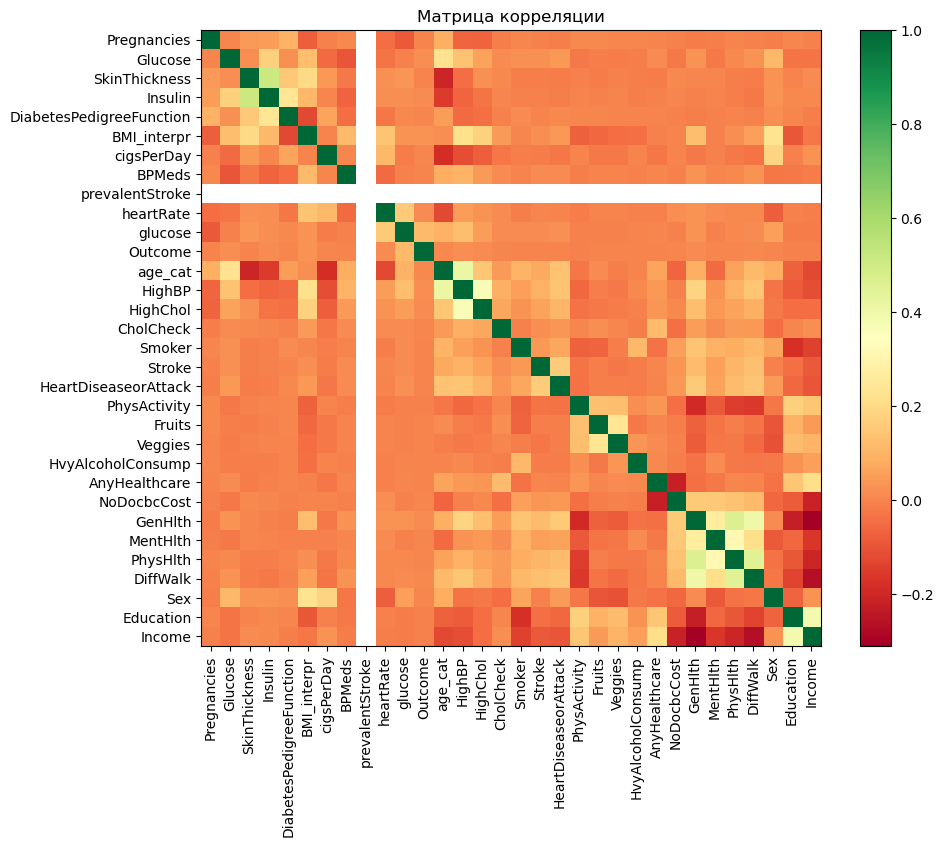

In [112]:
numeric_df = data.select_dtypes(include=['number'])

# Вычисляем матрицу корреляций
correlation_matrix = numeric_df.corr()

# Визуализация
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='RdYlGn', aspect='auto')
plt.title('Матрица корреляции')
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.colorbar()
plt.show();

In [113]:
data['Outcome'].value_counts()

0    567120
1       190
Name: Outcome, dtype: int64

In [114]:
data['prevalentStroke'].value_counts()

0    567310
Name: prevalentStroke, dtype: int64

In [115]:
data.drop(['prevalentStroke'], axis=1, inplace=True)

In [116]:
data.corr()['Outcome']

Pregnancies                -0.001207
Glucose                     0.017869
SkinThickness              -0.002439
Insulin                     0.013831
DiabetesPedigreeFunction    0.004574
BMI_interpr                 0.030594
cigsPerDay                  0.002600
BPMeds                     -0.002750
heartRate                   0.015218
glucose                     0.117931
Outcome                     1.000000
age_cat                     0.010333
HighBP                      0.018674
HighChol                    0.012527
CholCheck                   0.004511
Smoker                     -0.001413
Stroke                     -0.000256
HeartDiseaseorAttack       -0.000030
PhysActivity               -0.004357
Fruits                     -0.001263
Veggies                     0.000426
HvyAlcoholConsump          -0.002917
AnyHealthcare               0.000236
NoDocbcCost                 0.006110
GenHlth                     0.014248
MentHlth                    0.004054
PhysHlth                    0.005102
D

**Выводы**

При объединении таблиц формируются новые строки похожих наблюдений, чем можно расширить рабочий датасет.

Некоторые столбцы не подходят для объединения столбцов, хотя логически они должны содержать похожую информацию. Например, глюкоза в первых двух таблицах, образование, или возраст в третьей таблице.
В результате в данных появляются расхождения.

Объединение несбалансированных выборок создает более несбалансированную.

Несбалансированность данных существенно затрудняет использование корреляции как меры зависимости. Даже если переменные имеют сильное значение для классификации редкого класса, корреляция близка к нулю.

---

Создать сбалансированную выборку, внести в нее все наблюдения с положительным результатом(1) и случайным образом отобранных ~200 наб наблюдений с отрицательным результатом(0).

In [117]:
# Фильтруем строки, где Outcome == 0
df_outcome_0 = data[data['Outcome'] == 0]
df_outcome_1 = data[data['Outcome'] == 1]

# Случайным образом выбираем 200 строк
df_sample = df_outcome_0.sample(n=200, random_state=42)  # random_state для воспроизводимости

df_combined = pd.concat([df_sample, df_outcome_1], ignore_index=True)

df_combined

,Pregnancies,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction,BMI_interpr,cigsPerDay,BPMeds,heartRate,glucose,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Education,Income
0,9,91,0,0,0.200,3,0.0,0.0,68.0,76.0,...,1,1,0,1,1,2,0,0,6,8
1,0,137,27,0,0.231,4,0.0,1.0,62.0,83.0,...,0,1,0,1,0,0,0,0,5,8
2,10,133,0,0,0.245,4,43.0,0.0,95.0,100.0,...,0,0,0,2,0,0,0,0,6,6
3,4,141,0,0,0.244,4,0.0,0.0,72.0,63.0,...,0,1,0,2,0,0,0,1,6,8
4,4,103,33,192,0.966,3,0.0,0.0,86.0,69.0,...,0,1,0,2,0,0,0,0,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,9,156,0,0,0.230,3,0.0,0.0,76.0,108.0,...,0,1,0,2,0,0,0,1,6,7
386,9,156,0,0,0.230,3,0.0,0.0,76.0,108.0,...,0,1,0,2,10,2,0,1,6,7
387,9,156,0,0,0.230,3,0.0,0.0,76.0,108.0,...,0,1,0,2,0,0,0,1,5,3
388,9,156,0,0,0.230,3,0.0,0.0,76.0,108.0,...,0,1,0,2,0,1,0,1,4,7


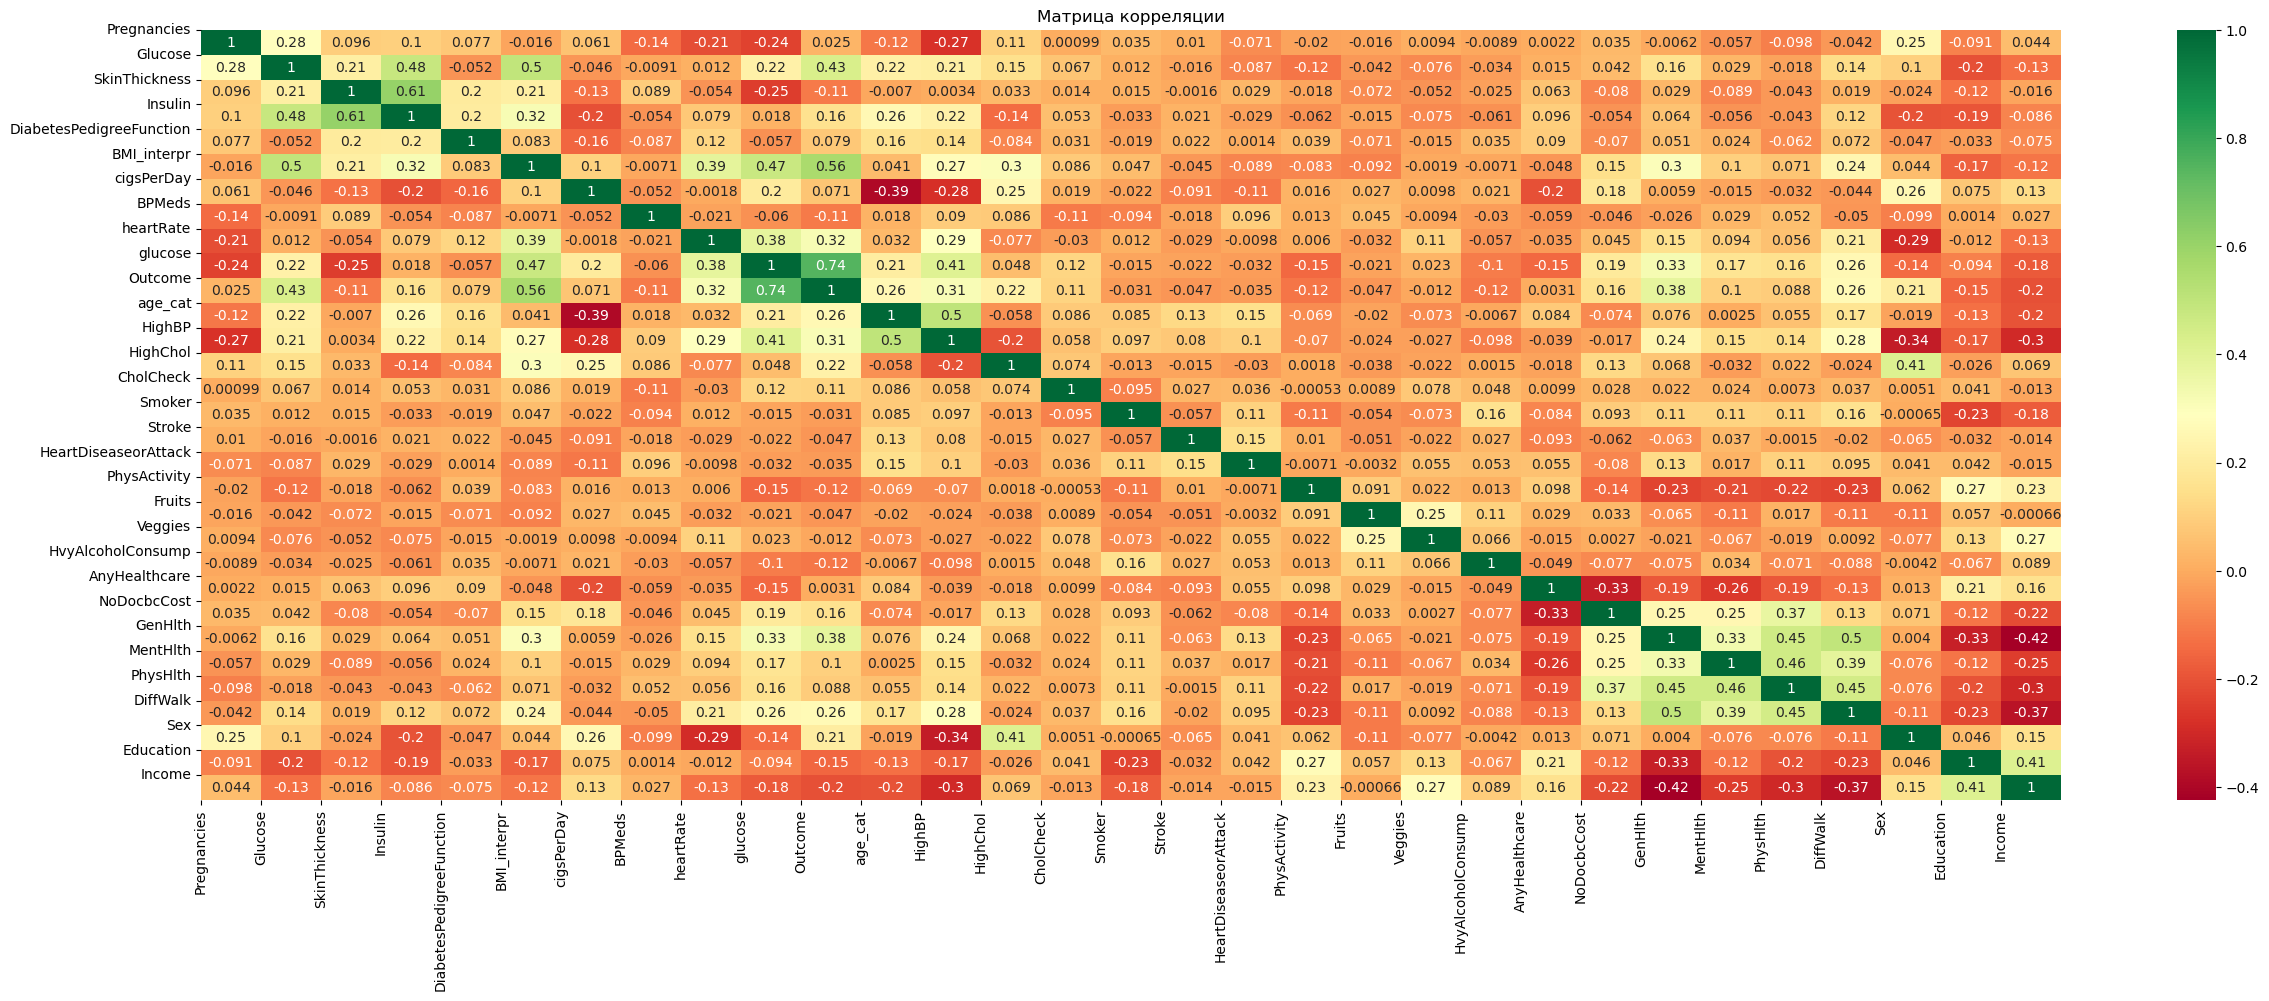

In [118]:
# Вычисляем матрицу корреляций
correlation_matrix = df_combined.corr()

# Визуализация
plt.figure(figsize=(30, 10))

sns.heatmap(correlation_matrix, cmap='RdYlGn', annot = True)
plt.title('Матрица корреляции')
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.show();

In [119]:
outcome_corr = df_combined.corr()['Outcome']
outcome_corr

Pregnancies                 0.024992
Glucose                     0.427268
SkinThickness              -0.108543
Insulin                     0.158544
DiabetesPedigreeFunction    0.078659
BMI_interpr                 0.560055
cigsPerDay                  0.071145
BPMeds                     -0.111075
heartRate                   0.319813
glucose                     0.744540
Outcome                     1.000000
age_cat                     0.255486
HighBP                      0.313409
HighChol                    0.224274
CholCheck                   0.114252
Smoker                     -0.031081
Stroke                     -0.047306
HeartDiseaseorAttack       -0.034883
PhysActivity               -0.121301
Fruits                     -0.046875
Veggies                    -0.011577
HvyAlcoholConsump          -0.116537
AnyHealthcare               0.003109
NoDocbcCost                 0.158810
GenHlth                     0.378805
MentHlth                    0.103584
PhysHlth                    0.088113
D

In [120]:
outcome_corr[(outcome_corr > 0.15) | (outcome_corr < -0.15)].sort_values(ascending=False)

Outcome        1.000000
glucose        0.744540
BMI_interpr    0.560055
Glucose        0.427268
GenHlth        0.378805
heartRate      0.319813
HighBP         0.313409
DiffWalk       0.263681
age_cat        0.255486
HighChol       0.224274
Sex            0.208785
NoDocbcCost    0.158810
Insulin        0.158544
Education     -0.153493
Income        -0.204916
Name: Outcome, dtype: float64

### Выводы

Наибольшим образом на положительный результат в определении диабета повлияют высокий уровень глюкозы (корреляция 0.75) и индекс массы (корреляция 0.55), частота сердечных сокращений(0.43)

С возрастом повышается уровень холестерина, давление и риск диабета (0.29, 0.30 и 0.39 соответственно)

Слабая корреляция диабета с общим самочуствием и трудностями при физической нагрузке.

Также пациентам с низким уровнем дохода и образования чаще диагностируют диабет

Данные показали практически отсутствие кореляции с употреблением фруктов и овощей, физической активностью, курением, алкоголем.